# **Lecture 24 - Prediction - k-Nearest Neighbors**

---

<br>

### Packages

In [ ]:
library(class)   # library for classification
library(ggplot2) # library for visualization

---

<br>

### k-Nearest Neighbors

In [ ]:
# dataset from slides
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


***k-nearest neighbors algorithm development***

1. Randomly select a proportion of your sample for “testing” (typically 30%)
The remaining observations are using for “training”

2. Select a value of ‘k’

3. Classify each observation in the testing set using the k nearest neighbors in the training dataset

4. Calculate the accuracy of our predictions on the testing set using the true labels

5. Repeat this process for several values of ‘k’

6. Select ‘k’ with the highest accuracy on the testing set. This is our final model.


---

<br>

1. Randomly select a proportion of your sample for training (typically 70%) and “testing” (typically 30%)
The remaining observations are using for “training”

In [ ]:
# number of rows in dataset
nrow(iris)

# size of training dataset
training_data_size <- round(0.7 * nrow(iris))
training_data_size

# size of testing dataset
testing_data_size <- nrow(iris) - training_data_size
testing_data_size

# ignore
set.seed(123)

# sample indexes for training data
training_sample <- sample(1:nrow(iris), training_data_size)
training_sample

# sample our training data
train_data   <- iris[training_sample, c("Sepal.Length", "Sepal.Width")]
head(train_data)

# training labels
train_labels <- iris[training_sample, "Species"]
head(train_labels)

# remaining rows are the testing data
test_data    <- iris[-training_sample, c("Sepal.Length", "Sepal.Width")]
head(test_data)

# testing labels
test_labels  <- iris[-training_sample, "Species"]
head(test_labels)

[1] 150

2. Select a value of ‘k’

In [ ]:
# select k
k <- 1

3. Classify each observation in the testing set using the k nearest neighbors in the training dataset

In [ ]:
# "train" k-nearest neighbors and predict
predictions <- knn(train = train_data,    # training predictors (x-variables)
                   test  = test_data,     # testing predictors (x-variables)
                   cl    = train_labels,  # the true training labels (y-variable)
                   k     = k )

4. Calculate the accuracy of our predictions on the testing set using the true labels

In [ ]:
# calculate prediction accuracy
accuracy <- sum(predictions == test_labels) / length(test_labels)
print(paste("Accuracy:", round(accuracy * 100, 2), "%"))

[1] "Accuracy: 62.22 %"


5. Repeat this process for several values of ‘k’.

    * A loop would be useful here.

In [ ]:
# select k
k <- 11

# ignore
set.seed(1)

# "train" k-nearest neighbors and predict
predictions <- knn(train = train_data, # training predictors (x-variables)
                   test = test_data,   # testing predictors (x-variables)
                   cl = train_labels,  # the true training labels (y-variable)
                   k = k)

# calculate prediction accuracy
accuracy <- sum(predictions == test_labels) / length(test_labels)
print(paste("Accuracy:", round(accuracy * 100, 2), "%"))

[1] "Accuracy: 86.67 %"


---

<br>

### Confusion Matrix

* In addition to accuracy, we can compare our predictions to our true labels using something called a ***confusion matrix***

* The confusion matrix counts all correct and incorrect classifications across each label

* We create a confusion matrix using the `table()` function
* The diagonal of the confusion matrix contains all of our CORRECT classifications

* The off-diagonal of the confusion matrix contains all of our INCORRECT classifications



In [ ]:
# select k
k <- 150

# ignore
set.seed(1)

# "train" k-nearest neighbors and predict
predictions <- knn(train = train_data, # training predictors (x-variables)
                   test = test_data,   # testing predictors (x-variables)
                   cl = train_labels,  # the true training labels (y-variable)
                   k = k)

# calculate prediction accuracy
accuracy <- sum(predictions == test_labels) / length(test_labels)
print(paste("Accuracy:", round(accuracy * 100, 2), "%"))

# confusion matrix
table(test_labels, predictions)

Warning message in knn(train = train_data, test = test_data, cl = train_labels, :
“k = 150 exceeds number 105 of patterns”


[1] "Accuracy: 28.89 %"


            predictions
test_labels  setosa versicolor virginica
  setosa          0          0        14
  versicolor      0          0        18
  virginica       0          0        13

* From the confusion matrix above, we observe that
  * 14 flowers that are setosa were CORRECTLY classified as setosa
  * 6 flowers that are versicolor were INCORRECTLY classified as virginica
  * etc.

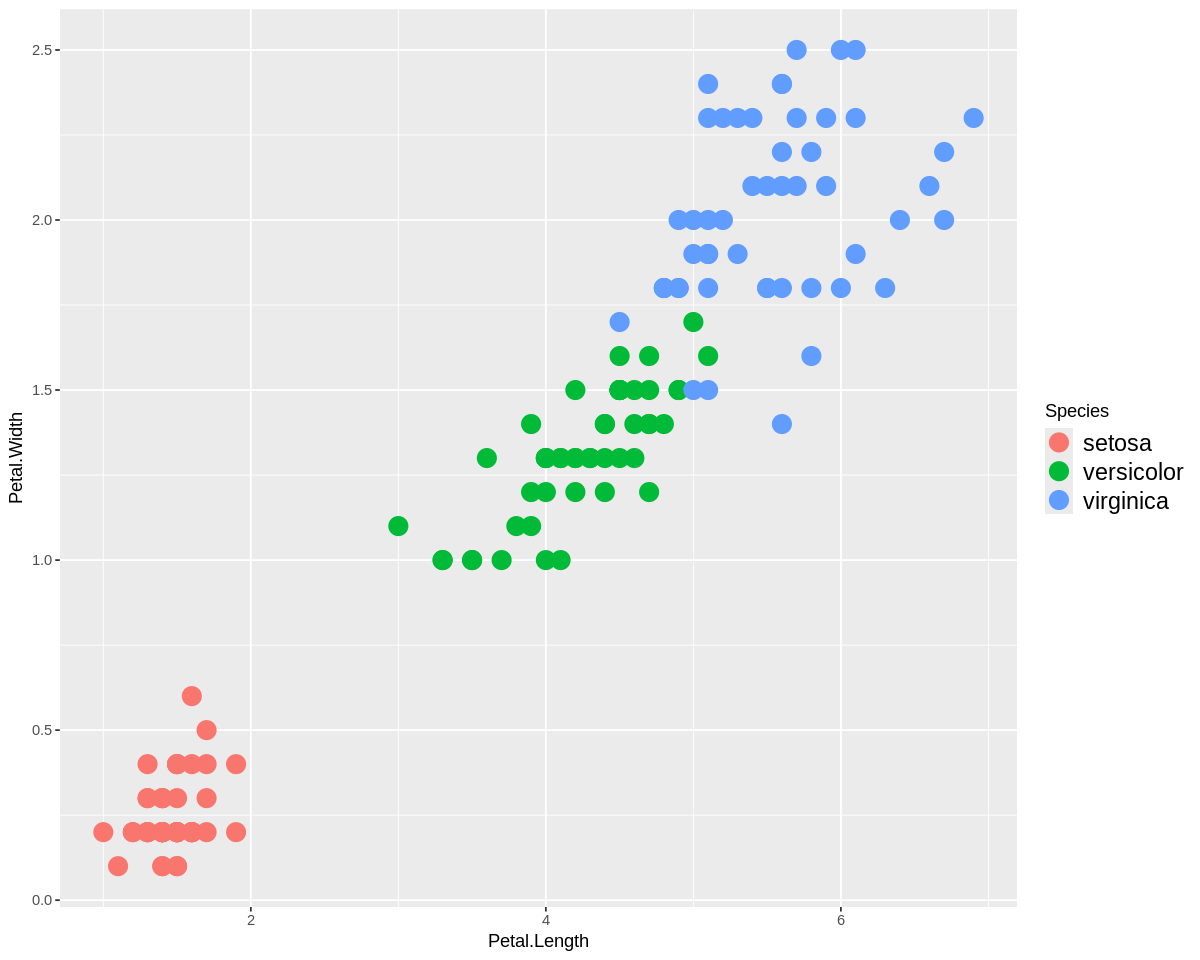

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(data = iris, aes(x = Petal.Length, y = Petal.Width, color = Species)) +
  geom_point(size = 5) +
  theme(legend.text = element_text(size = 14))

# Course Transcript

Hi class. So welcome to today's lecture. Today we're going to cover a bit of machine learning. Specifically, we're going to learn a little bit about this thing called prediction, and more specifically, an algorithm called the k-nearest neighbors algorithm, which is a nice introductory algorithm to introduce the concept of prediction and machine learning.

Introduction to prediction.

In this course, we've learned a lot. We've mostly focused, though, on understanding relationships between variables in a dataset. We did this a lot through visualization. To visualize the relationship between two continuous variables, we would use a scatterplot. To visualize the relationship between a continuous variable and a categorical variable, we would use a boxplot.

We also learned a bit about simple linear regression to model the relationship between two continuous variables.

Then we learned how to use bootstrapping, based on the concept of sampling, to conduct inference—determining if a slope is significantly different from zero, or determining if the means within each group of a categorical variable differ from one another. These are all ways to analyze relationships between variables.

Now, there's another major aspect of data science, and it's called prediction. In prediction, we are still interested in relationships between variables, but we use those relationships to make predictions on new observations.

In machine learning, the goal of prediction is to predict unknown or future outcomes. So we want to predict some Y variable from a set of data. For example:

Suppose our Y variable is whether someone will have a heart attack within the next year. We want to be able to predict or classify individuals as likely to have a heart attack based on predictors like age (since heart attack risk increases with age), sex at birth, blood pressure, and calories.

Another example is predicting a continuous outcome—like wave height—based on predictors such as wind, wind direction, ocean tides, and swell direction (whether it's from the Arctic or the southwest).

A final example: we might want to classify a tumor found on an MRI or CT scan as benign or malignant, without doing something invasive like a biopsy. We could predict its status using variables like tumor size, location, proximity to veins, or family history of cancer.

If we're predicting a continuous (numeric) outcome—like surf height—this type of task is called regression.

Conversely, if we're predicting a categorical outcome—like heart attack status or tumor classification—this task is called classification. Based on the X variables, we aim to classify the tumor as benign or malignant. The outcome here is not continuous.

Briefly, there's a lot of terminology in machine learning and data science for X and Y variables. I'll try to stay consistent, but generally:

- We call the X variables (the inputs into the prediction algorithm) "predictors."
- In machine learning, these are more commonly called "features."
- They are also referred to as "inputs," because they're input into the machine learning algorithm.
- In statistics, they're often called "covariates," "independent variables," or "explanatory variables" (since they help explain variation in the outcome).

For the outcome or Y variable, we might call it the "outcome," "response," "target," "label," "class" (for categorical variables, since we’re classifying), or "dependent variable."

Again, "features" is the most commonly used term in machine learning for X variables.

Alright. So in this field this broad field of machine learning the task of prediction, is known as something called supervised learning, which you may have heard before.

Now, specifically, supervised learning is the process of creating some algorithm or learning to predict Y variables from X variables. Right? So we have inputs and outputs. We basically want to predict our outputs from a set of inputs. So this is supervised learning.

Now, contrary to this concept of supervised learning is something called unsupervised learning. Right? So this is basically learning the structure of your data set without the use of any outcomes or outputs. So think of this as only having a set of X variables or independent variables, right? And from those independent variables we just want to learn something about our data, a form of unsupervised learning you may have learned in the past is principal components analysis. You might have heard of that.

The thing is today we're going to focus only on supervised learning. So we're gonna look at a predictive task where we have not only inputs or X variables, but we have outputs or y variables. And we want to predict these Y variables from our X variables.

So again, supervised learning is the task of predicting an outcome from a set of X variables, or predictors or features.

The thing is, how are we going to make these predictions? Right? All we have is a data set with, say, 4 columns. We have tumor, size, tumor, location, family history, and another column called Tumor Status, which we will consider our Y variable or our outcome.

Now, the way in which we can make predictions is basically supervised learning. Right? It's a set of machine learning algorithms that learn some relationship between our X's and Y so that we can predict Y from our X's.

Now, there are so many machine learning algorithms out there, specifically many, many different supervised learning algorithms. And within each class of methods. There are several types of algorithms. Right? So for one, there's multiple linear regression, which is a slight extension to the simple linear regression method that we learned not too long ago. That's mainly used for regression, as in predicting continuous outcome.

Not to be confused. There is also logistic regression that's actually used for classification. It's a little confusing because it has regression in the name. But we typically use logistic regression in machine learning for the task of classification.

There's also naive bays K, nearest neighbors which we'll go over today. Random Forest, which is very, very popular support vector machines which is losing a bit of popularity to neural networks. Right? If you think about neural networks, that's basically anything involving images that you see generative AI. All of that stuff is neural networks.

Now. Each has their advantages, however, for an introduction to this concept of supervised learning. We're gonna cover K, nearest neighbors today, right? But I encourage you to explore all of these other algorithms as well, especially random forests and neural networks. Those 2 are definitely some of the most popular algorithms out there.

Alright. So we're gonna cover the K nearest neighbors algorithm for classification as a way of performing supervised learning.

So key nearest neighbors, it's quite a simple algorithm. But it can be very powerful, especially in the presence of a lot of data.

Can be used for either regression or classification, and it essentially works by predicting our Y variable, our outcome based on the outcomes of the K nearest neighbors or the K most similar observations. Now, K is just an integer. So if K is set to 5, we look at the 5 closest rows to what we're predicting, and we basically take a vote of which outcome it should be.

So more specifically, let's use K-nearest neighbors to predict the species of a flower.

There could be 3 species, Satosa, versicolor, and Virginica, from their set of features or predictors. So this will be our Y variable, our outcome denoted by the colors here, and the predictors or features will be our X variables, which is just the sepal width and sepal length which are just attributes of that flower.

And we'd like to determine the species of a new flower. We want to predict or classify this new species, and I denote this hypothetical new flower based on this star here.

Now how K nearest neighbors works is we classify this star, this new observation, using the labels of the flowers that are close by to it, based on the features. What I mean by that is, we look at the neighboring flowers that we have.

We don't have the species of this star because it's a new flower.

But we have the species of all these other flowers.

And we look at the surrounding species, and just determine or predict the species of the star flower based on its neighbors.

Alright. So if we set K to one, so we look at a single nearest neighbor.

Well, the single nearest neighbor is this blue dot here, which is Virginica. So since the closest flower is Virginica, we classify it as Virginica, we classify the star as Virginica.

If we were to extend it to K equals 2 nearest neighbors.

Well, we have one being versicolor here, and then one being Virginica.

In this case, sometimes we use the distance from those 2 flowers to classify, or we just flip a coin. So this, since it's closer to Virginica, we might label it Virginica.

We can also look at the 3 nearest neighbors. Which are these 3 flowers here, and since 2 out of 3 of those neighbors are Virginica. We're going to label it as Virginica. And that's our prediction. That's our classification.

And it's as simple as that. Our prediction is basically the most common label of the flowers. K nearest neighbors. That's pretty much it.

And I say almost here, because we now need to determine what K should be.

Alright. From our brief implementation of K nearest neighbors, we have predictions for different values of K, right for K equals one. Our prediction was Virginica.

From this dot here from K equals 2. Our prediction was either versicolor or Virginica. If we were to flip a coin it could be versicolor.

Kegels. 3. Our prediction was Virginica as well.

Now the point here is that if we change K. Right, K equals 1, 2, 3, 4, 5, as many as possible. The predictions of this new observation, this new flower, can actually change with different values of K, so it's not a consistent prediction which could be a problem.

So the thing is, we need a way to select K. We want a way to select the optimal K. And what does that mean?

Well, just going back to the definition of prediction.

The goal of prediction is essentially to predict labels of new data, new observations that we don't actually have.

So we in this context, we want to be able to predict the species of new flowers like this star outside of our data set, but we want to do so as accurately as possible.

Right? So what we need is we need to select K

Such that our accuracy of our classifications are as high as possible. We basically want to select the number of neighbors that maximizes our accuracy

when we classify new flowers. But there's a problem here, a major problem.

We don't know the labels of our outside data. That's the whole point of prediction. We don't actually know that this star is Virginica or versicolor. So what is a solution in this case?

If you think about it?

Well, what we can do is we randomly select observations which are each dot. We randomly select rows from our data frame

as from our current sample, and we just take those rows and pretend that those rows are our out of sample data set.

This is a very fundamental concept that I use all the time in machine learning. It's a fundamental concept, specifically, or especially in supervised learning called the training testing split.

You sample observations and you develop a model

based on those observations. And then you evaluate its accuracy on your testing observations.

Alright. So here's a brief overview of how K nearest neighbors works. When you want to select the optimal K.

So we have our data here.

This is our data. I've reduced it down just for simplicity, as an example. And we want to classify, say, a new flower as either Satosa, versicolor, or Virginica. The thing is, if we're developing an algorithm, we don't actually have the true species. We're predicting that species. So as I said before, we need to randomly select observations and treat them as our pretend data set. That's our outside observations.

So what we do here is, we randomly select a proportion of our data. So a proportion of the sample for training. This is used to develop

our K nearest neighbors algorithm. So anything with a color, we know the true label here. This is our training data and the remaining observations are used for our testing data set. So we're going to pretend that we don't actually know

those species classifications. And we're going to try and predict those just from these data here.

So from there we can select a single value of K, typically, you want to start with K equals one

And then, based on that value of K, we classify each observation in our test set. So these 3 dots

using the K nearest neighbors. So here this little donut circle that's our classification and the color of the dot in the center is the true label. Because this dot is closest, the nearest neighbor is this triangle here, and that is Satosa.

We classify this observation or this flower as Satosa.

And that's a correct classification, because the round donut color is the same as the circle. However, if we look at this green dot, this flower is actually versicolor.

But because the closest training observation here

is Virginica. We incorrectly classify it as Virginica, despite it truly being versicolor.

Here, we've correctly classified this flower as Virginica.

Now, from there we've made our predictions on our pretend outside data set, which is our test set

and based on those predictions. We have an accuracy. So out of our 3 testing points, our 3 test flowers. We've correctly classified 2 of them. So our accuracy is 66%

when we set K equals to one.

Now, if we continue this process

and we set K equals to 2 and then make predictions. Then K equals 3. Make predictions, calculate the accuracy. What we then have is several values of K with several accuracies.

We then select K with the highest accuracy on the test set. And that is our algorithm. So then, when you get new flowers that you want to classify their species, you just use that value of K, that you've determined from this training process.

Now, this is the whole purpose of that training test split. And you use this training test split with any algorithm out there, whether it be logistic regression

or neural networks, random forest. You always have these training testing type splits.

So let's go ahead and illustrate this in R. I'm not going to have you actually calculate distances. There's a function that will do this for you. But it's a nice introduction to this concept of supervised learning.


All right. So let's go ahead and implement the K nearest neighbors algorithm in R, which is our introductory supervised learning machine learning algorithm. We need this library called class for classification. It contains this K nearest neighbors algorithm. And we're also going to load ggplot2, just for some visualization purposes.

For K nearest neighbors, we're going to use that Iris dataset. Notice there are 4 separate predictor variables or 4 features which we could use to predict species, but based on lecture we only used sepal length and sepal width. So we're going to use those 2 columns.

Now, this is just a recap of how the nearest neighbors algorithm works. You select your testing and training split. Select a value of K, then you classify each observation using the K nearest neighbors. If you set K to one and so on. You then calculate the accuracy of those predictions and repeat this process for different values of K, and finally, select K with the highest accuracy.

So let's go ahead and randomly select our training and testing datasets. Our testing dataset remembers our pretend outside dataset.

Here we have in row. The Iris data frame has 150 observations. And we're going to sample 70% of those observations. A hundred five random observations from this data frame will be our training data. And then the remaining will be 45. So we're going to use 45 of the flowers for testing.

Then I'm going to sample from one through the number of rows. A hundred five rows. This will be my training sample.

You see that we have row 14, row 50, row 118, row 43, flower 150, flower 148. All of these different flowers. They will be in our training dataset. And the remaining will be in our testing dataset.

So I'm going to actually use these row indices to pull those observations of sepal length and sepal width for training. I take my indices for my training sample, and I only pull my columns. So I want sepal length and sepal width.

This will be my training data and similar. I'm going to take my training sample with species. And that will be my training data for my outcome.

You see that we have a data frame of our features or predictors, sepal length and sepal width for our training data. And we also have our responses or Y variables for our training data.

And we'll do the same for our test data.

The way we do this is we have that minus here. Remember that says we want not this training sample. So we want everything but the training indexes. So we're taking the remaining rows and making this our test data.

Since row one isn't here, it's now in our test dataset.

We then select a value of K, so I'll run that set K equals to one. Because we want to look at classifying these flowers in the test dataset using only the single nearest neighbor.

And then we run this KNN function, which is our K nearest neighbors algorithm.

The way this works is we specify our training data, which is just the features of our training data. We specify our testing data, which is just the features of our testing data shown here. So not the responses.

Then we specify our training labels. These are the true species of our training data. Notice how we don't care about what the testing labels are, because we're pretending we don't know those. We're going to predict those and then compare them to the true testing labels later on.

I set K here to one. K is set to one, and I'll run those.

Now I could show you these predictions.

If I look at the length of these predictions, there's 45. So these are the predictions for our testing dataset.

I can even show you data.frame test labels. If I create a data frame, you can see that this first column. These are true labeled and the second column. These are predictions, and we're doing pretty well so far. But notice how there are some differences like the true label for one flower is versicolor, and here we predicted it as Virginica.

Now I'm going to give you the code for accuracy. It's just the proportion of flowers that were correctly classified, based on their true label. And all that's doing is saying which of these predictions are equal to the true test labels, and I'm just gonna count them and divide them by the number of flowers.

So here, accuracy is not very good. It's only about 62%.

Now, what we need to do is repeat this process to determine which value of K would maximize our accuracy.

Now we repeat all of these steps for different values of K, and we want to select K that maximizes our accuracy.

Here we run it. We have 62% for this value of K. You can ignore this. That's just making it so that it doesn't change every time.

We set K equals 2, we have 64%. That's a slight improvement from the 62% from when we set K equals to one.

K equals 3. Now we're getting better. Notice how the accuracy is changing for different values of K.

K equals 4 even better. K equals 5 went down a little bit. K equals 6, 77%. That's pretty good. K equals 7, 80% even better. K equals 8 went down. And so on. Now it's just getting a little worse.

    So 87%. 12, 13, 84%.

    So let's set it to 11, or was it 12?

Let's just set it to 11. 80%, about 87%. So the value of K being 11 is what maximizes our accuracy on our test set. Now in the future, if you receive new flowers and would like to classify them based on the species, you would just set K equal to 11 and then run this algorithm on that set of new flowers. You don't need to search for K for the new data after that.

Alright. Now, in addition to just looking at accuracy, which represents the performance of our algorithm, we can also visually compare our predictions to our true labels, using something called the confusion matrix.

Confusion matrix is basically a heat map that we used before to visualize 2 categorical variables, except the 2 categorical variables are our predictions and our true labels.

And essentially the confusion matrix counts all correct and incorrect classifications across each label.

And we can create this using the table function. So it's very similar to the visualization code that we used before to compare 2 categorical variables.

So we'll go ahead and do that here.

Here's our results. And this is our confusion matrix here.

Now, in this confusion matrix, the diagonal—so the 14, 12, and 13—these contain all of our correct classifications.

So we correctly classified 14 Satosa flowers as Satosa.

We also correctly classified 12 versicolor flowers as versicolor, and so on.

However, if we look at the off diagonal, we have a 6 here.

Now, the off diagonal contains all of our incorrect classifications. So unfortunately, we classified 6 versicolor flowers incorrectly as Virginica.

Luckily we do have zeros here. This means that we classified the Satosa flowers as versicolor 0 times, so we made 0 of those incorrect classifications.

This is just visualizing the prediction or the original data. Now, one of the reasons why it's so difficult to separate versicolor and Virginica is there's so much overlap between these points. So the neighbors, it's very unclear how to classify this, because it's close to both Virginica and versicolor flowers.

Now, what can actually help improve classification is by including more predictor variables in your algorithm, which we'll do in the lab in our practice. So I could change this to petal width, and now things are more separated. In fact, I could change this to petal length.

And you'll see that petal length and petal width are better predictors.

And then you can include all 4 variables in your algorithm, and you'll likely get close to 100% accuracy.
